In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('combined_dataset.csv',encoding='ISO-8859-1')

In [ ]:
df.sample(10000)

,target,text
9979,spam,WIN: We have a winner! Mr. T. Foley won an iPo...
1935,spam,hi paliourg software cds 15 and 99 get al soft...
9765,ham,have * good weekend.
4854,spam,"get back to me please show , use , search . re..."
10274,ham,"Just looked it up and addie goes back Monday, ..."
...,...,...
4268,ham,re : meter # 1512 no one resolved this . it st...
2371,spam,"quailty web solutions , involutory overton , _..."
9957,ham,It is a good thing I'm now getting the connect...
5644,ham,Good afternoon sunshine! How dawns that day ? ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head(5)

,target,text
0,1,Congratulations! You've been selected for a lu...
1,1,URGENT: Your account has been compromised. Cli...
2,1,You've won a free iPhone! Claim your prize by ...
3,1,Act now and receive a 50% discount on all purc...
4,1,Important notice: Your subscription will expir...


In [ ]:
#missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#check for duplicate values
df.duplicated().sum()

674

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(10287, 2)

In [ ]:

df.head()

,target,text
0,1,Congratulations! You've been selected for a lu...
1,1,URGENT: Your account has been compromised. Cli...
2,1,You've won a free iPhone! Claim your prize by ...
3,1,Act now and receive a 50% discount on all purc...
4,1,Important notice: Your subscription will expir...


In [ ]:
df['target'].value_counts()

,count
target,
0,8014
1,2273


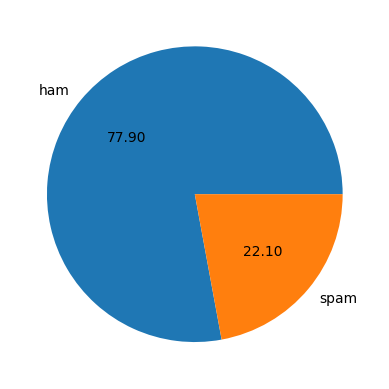

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,1,Congratulations! You've been selected for a lu...,90
1,1,URGENT: Your account has been compromised. Cli...,89
2,1,You've won a free iPhone! Claim your prize by ...,72
3,1,Act now and receive a 50% discount on all purc...,72
4,1,Important notice: Your subscription will expir...,94


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_sentences
0,1,Congratulations! You've been selected for a lu...,90,3
1,1,URGENT: Your account has been compromised. Cli...,89,2
2,1,You've won a free iPhone! Claim your prize by ...,72,2
3,1,Act now and receive a 50% discount on all purc...,72,2
4,1,Important notice: Your subscription will expir...,94,2


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,1,Congratulations! You've been selected for a lu...,90,3,17
1,1,URGENT: Your account has been compromised. Cli...,89,2,16
2,1,You've won a free iPhone! Claim your prize by ...,72,2,17
3,1,Act now and receive a 50% discount on all purc...,72,2,16
4,1,Important notice: Your subscription will expir...,94,2,16


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10287.000000,10287.000000,10287.000000
mean,548.088558,121.962769,7.514533
std,1169.195303,260.710192,20.336795
min,1.000000,0.000000,0.000000
25%,56.000000,14.000000,1.000000
50%,139.000000,30.000000,3.000000
75%,516.000000,119.000000,7.000000
max,31851.000000,8861.000000,1204.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8014.000000,8014.000000,8014.000000
mean,465.677939,109.780010,6.133891
std,1021.953258,247.468952,17.546399
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,103.000000,25.000000,2.000000
75%,418.000000,101.000000,6.000000
max,31851.000000,8861.000000,1204.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2273.000000,2273.000000,2273.000000
mean,838.646722,164.915970,12.382314
std,1548.246376,298.935281,27.498326
min,1.000000,0.000000,0.000000
25%,143.000000,28.000000,2.000000
50%,270.000000,54.000000,5.000000
75%,781.000000,163.000000,12.000000
max,21740.000000,3961.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

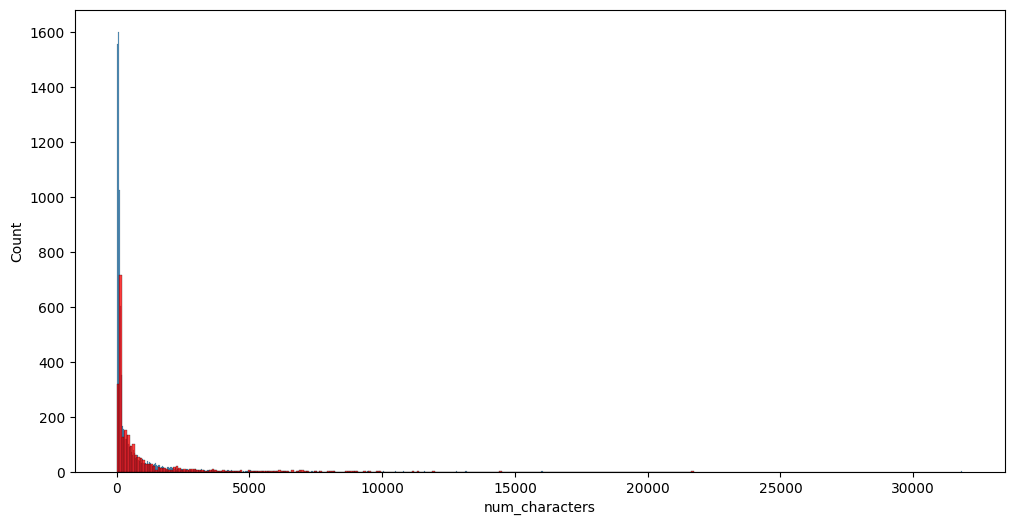

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

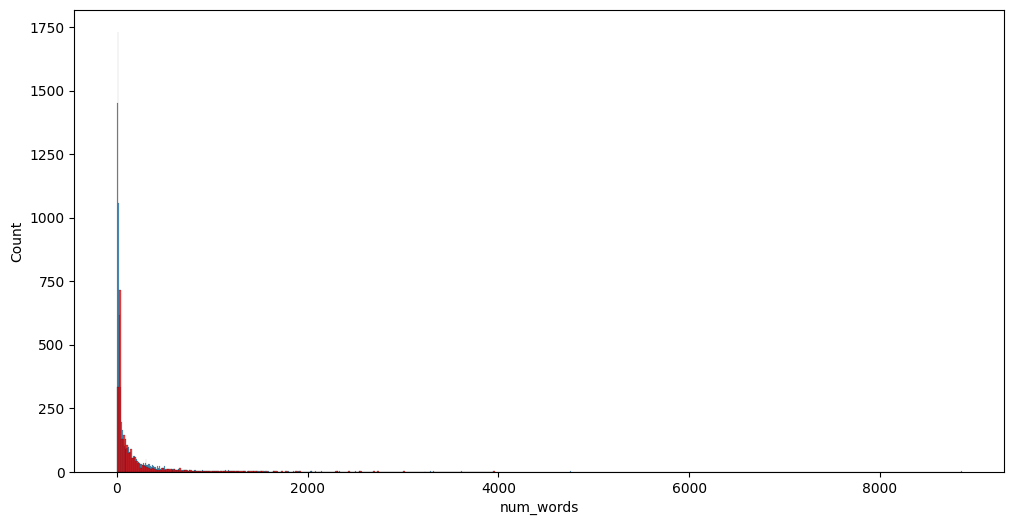

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

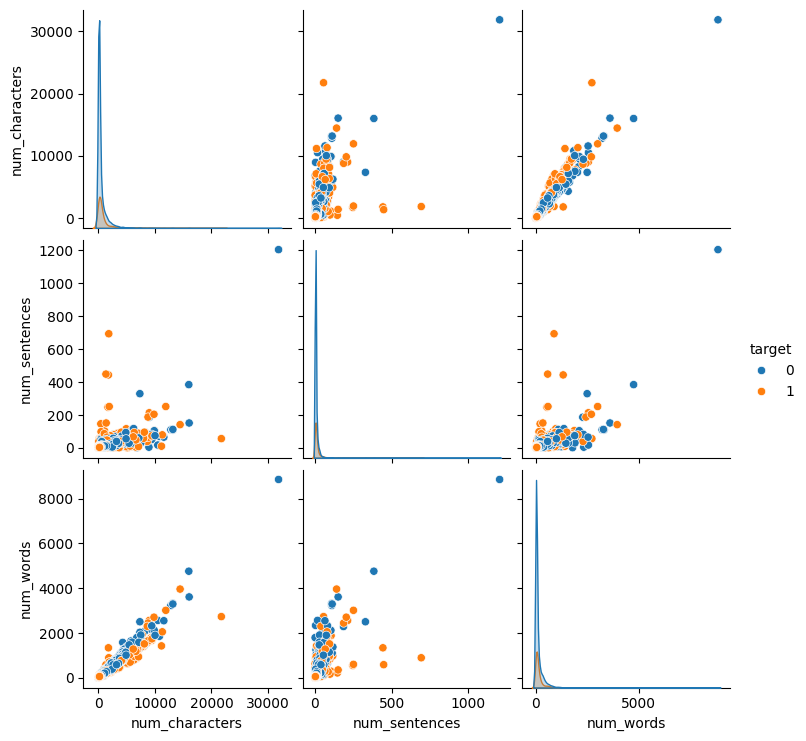

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,1,Congratulations! You've been selected for a lu...,90,3,17
1,1,URGENT: Your account has been compromised. Cli...,89,2,16
2,1,You've won a free iPhone! Claim your prize by ...,72,2,17
3,1,Act now and receive a 50% discount on all purc...,72,2,16
4,1,Important notice: Your subscription will expir...,94,2,16


In [ ]:

df['text'][10]

"You've been chosen for a special cash prize! Claim your winnings now."

In [ ]:
ps = PorterStemmer()
ps.stem('loving')


'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,1,Congratulations! You've been selected for a lu...,90,3,17,congratul select luxuri vacat getaway claim prize
1,1,URGENT: Your account has been compromised. Cli...,89,2,16,urgent account compromis click reset password ...
2,1,You've won a free iPhone! Claim your prize by ...,72,2,17,free iphon claim prize click link
3,1,Act now and receive a 50% discount on all purc...,72,2,16,act receiv 50 discount purchas limit time offer
4,1,Important notice: Your subscription will expir...,94,2,16,import notic subscript expir soon renew avoid ...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

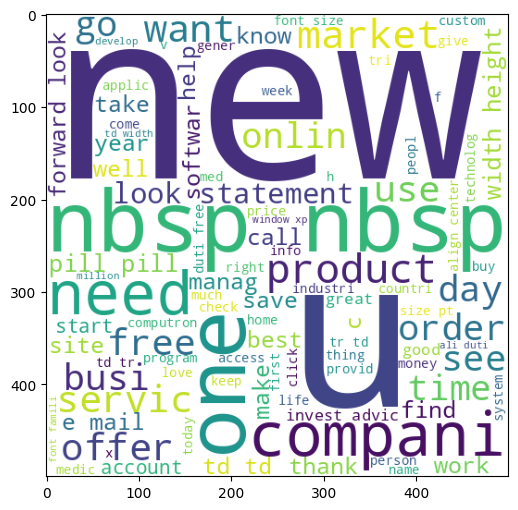

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

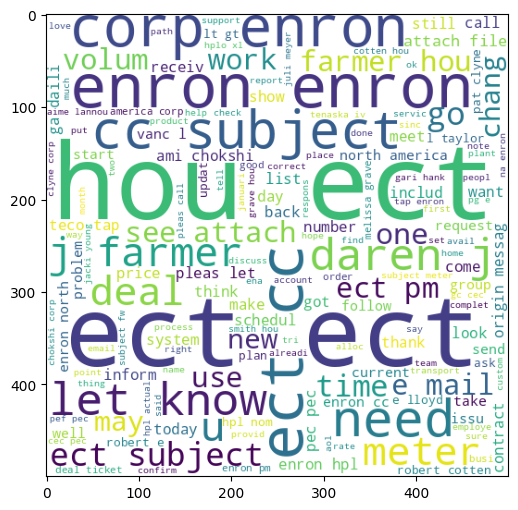

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,1,Congratulations! You've been selected for a lu...,90,3,17,congratul select luxuri vacat getaway claim prize
1,1,URGENT: Your account has been compromised. Cli...,89,2,16,urgent account compromis click reset password ...
2,1,You've won a free iPhone! Claim your prize by ...,72,2,17,free iphon claim prize click link
3,1,Act now and receive a 50% discount on all purc...,72,2,16,act receiv 50 discount purchas limit time offer
4,1,Important notice: Your subscription will expir...,94,2,16,import notic subscript expir soon renew avoid ...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

208334

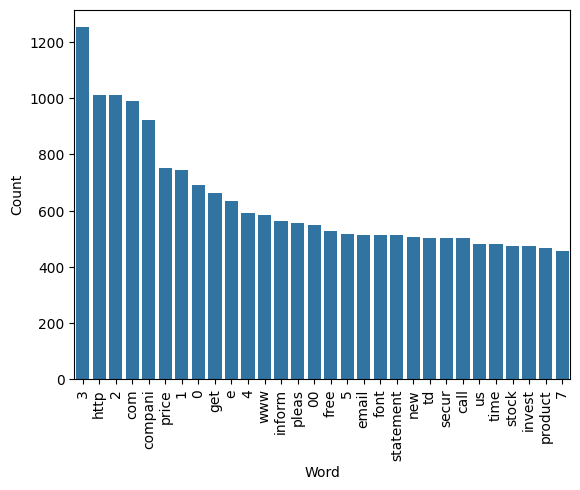

In [ ]:
from collections import Counter
counter = Counter(spam_corpus)

# Convert Counter to DataFrame
df_counter = pd.DataFrame(counter.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_counter)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

410326

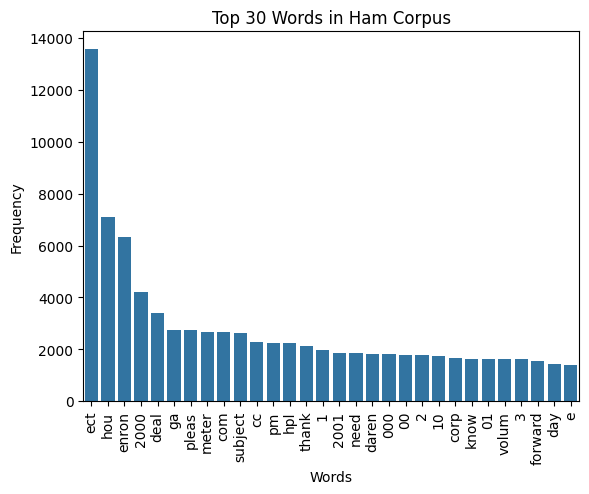

In [ ]:
from collections import Counter
counter = Counter(ham_corpus)

# Convert Counter to DataFrame
df_counter = pd.DataFrame(counter.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_counter)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in Ham Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,1,Congratulations! You've been selected for a lu...,90,3,17,congratul select luxuri vacat getaway claim prize
1,1,URGENT: Your account has been compromised. Cli...,89,2,16,urgent account compromis click reset password ...
2,1,You've won a free iPhone! Claim your prize by ...,72,2,17,free iphon claim prize click link
3,1,Act now and receive a 50% discount on all purc...,72,2,16,act receiv 50 discount purchas limit time offer
4,1,Important notice: Your subscription will expir...,94,2,16,import notic subscript expir soon renew avoid ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(10287, 3000)

In [ ]:
y = df['target'].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
#naive bayes
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Initialize mean, variance, and prior probabilities
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx] = X_c.mean(axis=0)
            self._var[idx] = X_c.var(axis=0) + 1e-9  # Add small value to avoid division by zero
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        log_priors = np.log(self._priors)
        posteriors = []

        for idx in range(len(self._classes)):
            pdf_vals = self._pdf(idx, X)
            log_likelihoods = np.log(pdf_vals + 1e-10)  # Avoid log(0)
            posterior = log_priors[idx] + log_likelihoods.sum(axis=1)
            posteriors.append(posterior)

        posteriors = np.array(posteriors).T  # Shape (n_samples, n_classes)
        predicted_class_indices = np.argmax(posteriors, axis=1)
        return self._classes[predicted_class_indices]

    def _pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((X - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Training the model
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, y_train)

# Making predictions
predictions = nb_classifier.predict(X_test)

# Evaluating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average='weighted'))
print("Recall:", recall_score(y_test, predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))




Accuracy: 0.2270861833105335
Precision: 0.8294259163168074
Recall: 0.2270861833105335
F1 Score: 0.09538758410727004


In [ ]:
#logistic regression
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return np.where(predictions >= 0.5, 1, 0)

# Training the model
lr_classifier = LogisticRegression(learning_rate=0.01, n_iterations=1000)
lr_classifier.fit(X_train, y_train)

# Making predictions
predictions = lr_classifier.predict(X_test)

# Evaluating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average='weighted'))
print("Recall:", recall_score(y_test, predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))


Accuracy: 0.7811217510259918
Precision: 0.6101511899259116
Recall: 0.7811217510259918
F1 Score: 0.6851313668753323


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# gradient boosting
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or len(set(y)) == 1:
            return np.mean(y)  # Return leaf node as mean prediction

        best_split = self._best_split(X, y, n_features)
        if best_split is None:
            return np.mean(y)

        feature_idx, threshold = best_split
        left_idx = X[:, feature_idx] <= threshold
        right_idx = X[:, feature_idx] > threshold

        left_subtree = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._grow_tree(X[right_idx], y[right_idx], depth + 1)

        return (feature_idx, threshold, left_subtree, right_subtree)

    def _best_split(self, X, y, n_features):
        best_mse = float('inf')
        best_split = None

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idx = X[:, feature_idx] <= threshold
                right_idx = X[:, feature_idx] > threshold
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                mse = self._calculate_mse(y[left_idx], y[right_idx])
                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature_idx, threshold)

        return best_split

    def _calculate_mse(self, left_y, right_y):
        left_mse = np.var(left_y) * len(left_y) if len(left_y) > 0 else 0
        right_mse = np.var(right_y) * len(right_y) if len(right_y) > 0 else 0
        return (left_mse + right_mse) / (len(left_y) + len(right_y))

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if not isinstance(tree, tuple):
            return tree
        feature_idx, threshold, left_subtree, right_subtree = tree
        return self._predict_one(x, left_subtree if x[feature_idx] <= threshold else right_subtree)

class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []
        self.initial_pred = 0

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.initial_pred = np.mean(y)
        residuals = y - self.initial_pred

        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=3)
            tree.fit(X, residuals)
            pred = tree.predict(X)
            residuals -= self.learning_rate * pred
            self.trees.append(tree)

    def predict(self, X):
        pred = np.full(X.shape[0], self.initial_pred)
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return np.where(pred >= 0.5, 1, 0)

# Training the model
gb_classifier = GradientBoosting(n_estimators=100, learning_rate=0.1)
gb_classifier.fit(X_train, y_train)

# Making predictions
predictions = gb_classifier.predict(X_test)

# Evaluating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average='weighted'))
print("Recall:", recall_score(y_test, predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))


Accuracy: 0.9151846785225718
Precision: 0.9178730860743581
Recall: 0.9151846785225718
F1 Score: 0.9090085549492538


In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if depth >= self.max_depth or len(set(y)) == 1:
            return np.mean(y)

        best_split = self._best_split(X, y, n_features)
        if best_split is None:
            return np.mean(y)

        feature_idx, threshold = best_split
        left_idx = X[:, feature_idx] <= threshold
        right_idx = X[:, feature_idx] > threshold

        left_subtree = self._grow_tree(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self._grow_tree(X[right_idx], y[right_idx], depth + 1)

        return (feature_idx, threshold, left_subtree, right_subtree)

    def _best_split(self, X, y, n_features):
        best_mse = float('inf')
        best_split = None

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_idx = X[:, feature_idx] <= threshold
                right_idx = X[:, feature_idx] > threshold
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                mse = self._calculate_mse(y[left_idx], y[right_idx])
                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature_idx, threshold)

        return best_split

    def _calculate_mse(self, left_y, right_y):
        left_mse = np.var(left_y) * len(left_y) if len(left_y) > 0 else 0
        right_mse = np.var(right_y) * len(right_y) if len(right_y) > 0 else 0
        return (left_mse + right_mse) / (len(left_y) + len(right_y))

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if not isinstance(tree, tuple):
            return tree
        feature_idx, threshold, left_subtree, right_subtree = tree
        return self._predict_one(x, left_subtree if x[feature_idx] <= threshold else right_subtree)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=3, sample_ratio=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_ratio = sample_ratio
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for _ in range(self.n_trees):
            indices = np.random.choice(n_samples, int(n_samples * self.sample_ratio), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.round(predictions.mean(axis=0)).astype(int)

# Training the model
rf_classifier = RandomForest(n_trees=10, max_depth=3, sample_ratio=0.8)
rf_classifier.fit(X_train, y_train)

# Making predictions
predictions = rf_classifier.predict(X_test)

# Evaluating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average='weighted'))
print("Recall:", recall_score(y_test, predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, predictions, average='weighted'))


Accuracy: 0.84359325125399
Precision: 0.8441777518524937
Recall: 0.84359325125399
F1 Score: 0.8168696106062449


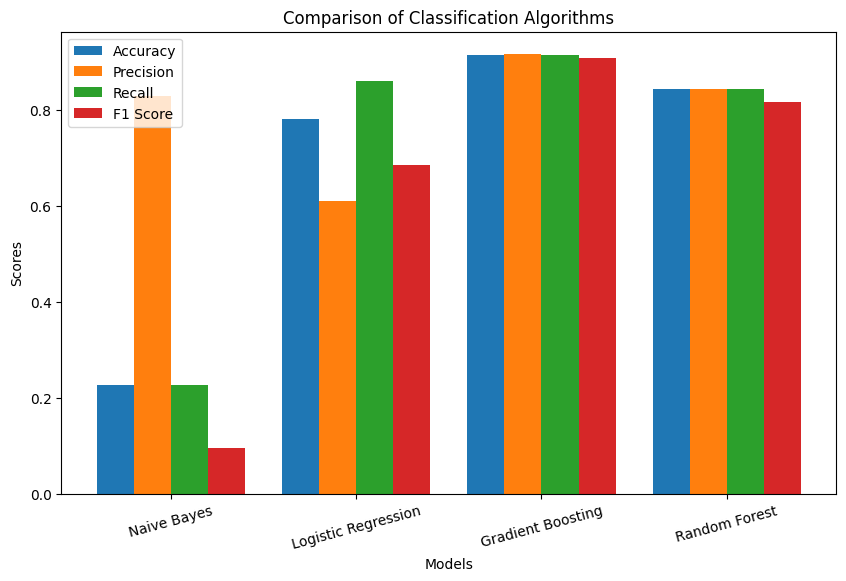

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = ["Naive Bayes", "Logistic Regression", "Gradient Boosting", "Random Forest"]
accuracy = [0.227, 0.781, 0.915, 0.843]
precision = [0.829, 0.610, 0.917, 0.844]
recall = [0.227, 0.86, 0.915, 0.843]
f1_score_values = [0.095, 0.685, 0.909, 0.816]

x = np.arange(len(models))
width = 0.2  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5 * width, precision, width, label='Precision')
ax.bar(x + 0.5 * width, recall, width, label='Recall')
ax.bar(x + 1.5 * width, f1_score_values, width, label='F1 Score')

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Classification Algorithms")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()

plt.show()


In [ ]:
import joblib

joblib.dump(nb_classifier, 'naive_bayes.pkl')
joblib.dump(lr_classifier, 'logistic_regression.pkl')
joblib.dump(rf_classifier, 'random_forest.pkl')


['random_forest.pkl']

In [ ]:
!pip install dill


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import dill as pickle

# Saving the Gradient Boosting model
with open('gradient_boosting.pkl', 'wb') as f:
    pickle.dump(gb_classifier, f)

#print("Model saved successfully!")


In [ ]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']